In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the MNIST dataset from keras

In [2]:
from keras.datasets import mnist
(train_X, train_y),(test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Plotting our data

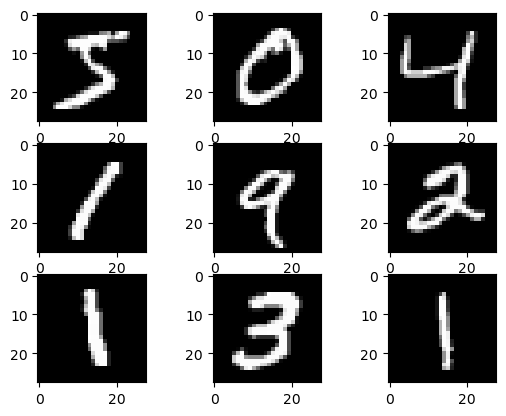

In [6]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Building our model

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)),Dense(units=25,activation='relu'),Dense(units=15,activation='relu'),Dense(units=20,activation='linear')])

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [10]:
from tensorflow.keras.optimizers import Adam

In [11]:
model.compile(optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'],loss=SparseCategoricalCrossentropy(from_logits=True))

In [12]:
model.fit(train_X,train_y,epochs=100,batch_size=100)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 2.5957 - accuracy: 0.5236
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.7470 - accuracy: 0.7919
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.8496
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.8753
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4006 - accuracy: 0.8900
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8995
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.9069
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.9114
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.9155
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2855 - accura

# PREDICTIONS

In [13]:
to_predict = np.array([test_X[0]]) #our input 
logits = model(to_predict) 
probs = tf.nn.softmax(logits)
predictions = tf.argmax(probs, axis=1)

In [14]:
predictions.numpy()

array([7])